<a href="https://colab.research.google.com/github/amine-2001/goldpriceprediction/blob/main/Cas1regressionfinale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.6 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
data = pd.read_csv('gld_price_data.csv')

In [ ]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


chech null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst = True)

<ipython-input-10-59b691fcced5>:1: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst = True)


In [ ]:
data.shape

(2290, 6)

check duplicate values

In [ ]:
data.duplicated().any()

False

<Axes: xlabel='Date'>

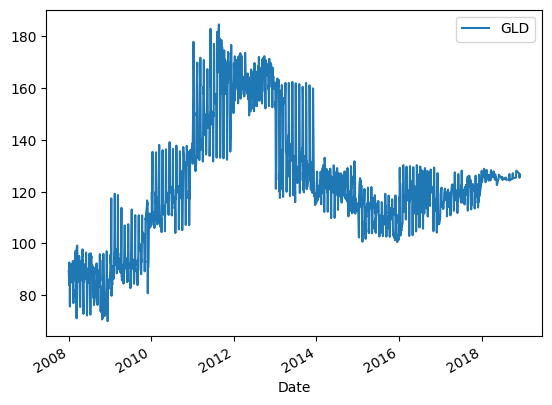

In [ ]:
data.plot(x = 'Date', y = 'GLD')

matrice de corrélation

<ipython-input-16-07ab7041b949>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

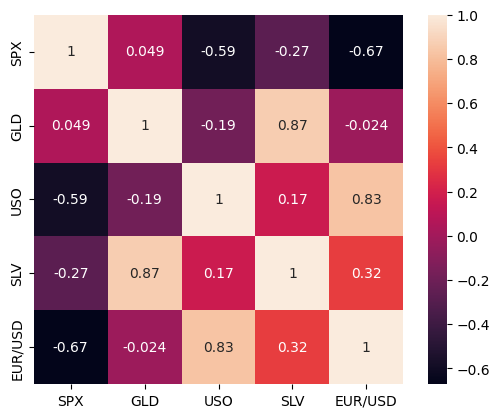

In [ ]:
correlation = data.corr()
sns.heatmap(correlation,cbar=True, square=True,annot=True)

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-954563e299eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

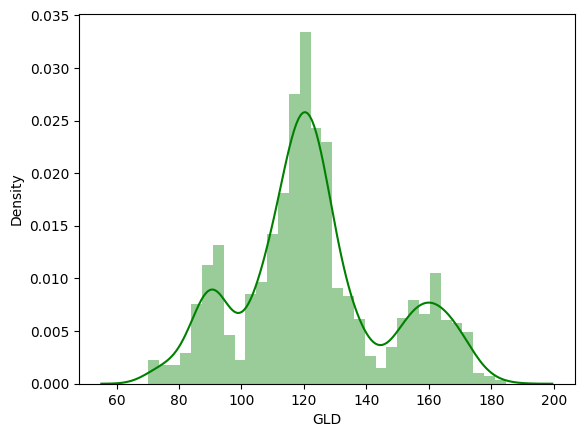

In [ ]:
sns.distplot(data['GLD'],color='green')

modeling

In [ ]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
x_test.shape

(458, 4)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

svm  = SVR()
svm.fit(x_train,y_train)

rf  = RandomForestRegressor()
rf.fit(x_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gbr.predict(x_test)
y_pred5 = xg.predict(x_test)

In [ ]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [ ]:
print(score1,score2,score3,score4,score5)

0.8975640982991402 0.13154484322439086 0.9896964257885116 0.9802289218125232 0.9885715958139172


In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
             'R2_SCORE':[score1,score2,score3,score4,score5]})

r2 score metrics

In [ ]:
final_data

,Models,R2_SCORE
0,LR,0.897564
1,SVR,0.131545
2,RF,0.989696
3,GB,0.980229
4,XGR,0.988572


<Axes: xlabel='Models', ylabel='R2_SCORE'>

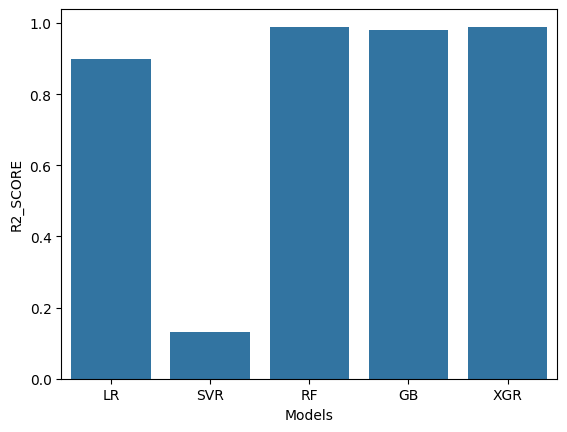

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['R2_SCORE'])

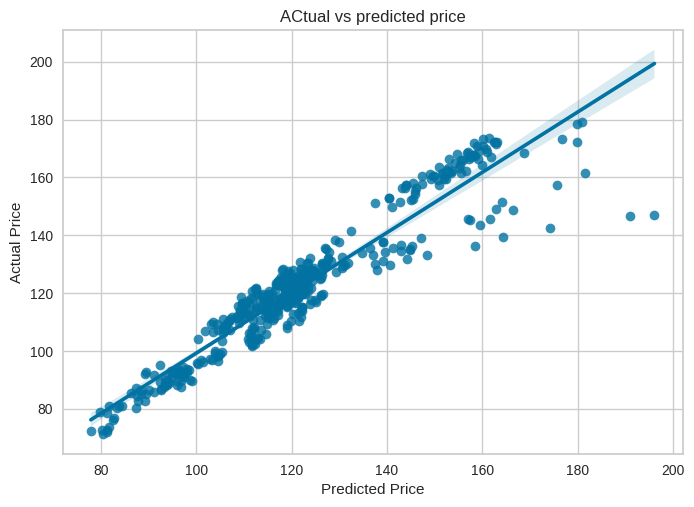

In [ ]:
sns.regplot(x=y_pred1, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()

In [ ]:
Y_test = list(y_test)

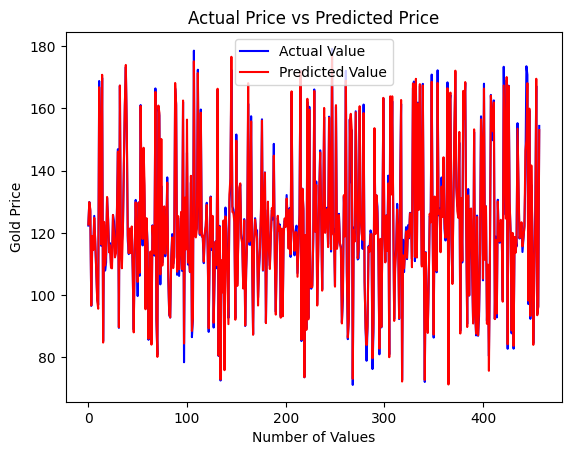

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(y_pred3, color='red', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
from pycaret.regression import *

# Initialiser l'environnement PyCaret
clf = setup(data, target="GLD", session_id=42)

# Comparer les modèles spécifiés
compare_models(include=['lr', 'rf', 'svm', 'gbr', 'xgboost'])


,Description,Value
0,Session id,42
1,Target,GLD
2,Target type,Regression
3,Original data shape,"(2290, 6)"
4,Transformed data shape,"(2290, 8)"
5,Transformed train set shape,"(1603, 8)"
6,Transformed test set shape,"(687, 8)"
7,Numeric features,4
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.3324,5.0937,2.1859,0.9904,0.0168,0.0108,0.8580
xgboost,Extreme Gradient Boosting,1.3176,5.1202,2.1946,0.9904,0.0165,0.0106,0.1510
gbr,Gradient Boosting Regressor,1.8782,7.6747,2.7385,0.9854,0.0217,0.0154,0.2980
lr,Linear Regression,5.3969,53.6921,7.3009,0.8983,0.0539,0.0431,0.6680
svm,Support Vector Regression,17.1900,533.4775,23.0705,-0.0034,0.1855,0.1417,0.1630


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=42)